In [6]:
#! pip install geopandas
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel('../Data/Data_train/Presences_Absences_Train.xlsx')

In [8]:
#nombre d'especes differentes 
unique_values_count = df['speciesId'].nunique()
print(unique_values_count)

2174


In [9]:
#idspece classées par nombres de recencements
counts = df.groupby('speciesId').size()
counts = counts.sort_values(ascending=False)
print(counts)

speciesId
4284    1925
8935    1885
5959    1564
386     1182
5314    1023
        ... 
4077       1
4082       1
8343       1
4137       1
5189       1
Length: 2174, dtype: int64


In [10]:
# On compte le nombre d'espèce et leur occurence 
nb_especes = df["speciesId"]
nb_especes = nb_especes.to_frame()
nb_especes['count'] = 1
sumup = nb_especes.groupby('speciesId').sum()
sumup = sumup.sort_values("count", ascending=False)

In [11]:
top_50 = []
# On extrait les 50 plus présentes et on récupère leurs Ids
i=0
while i< 50 :
    value = sumup.iloc[i]["count"]
    top_50 += sumup[sumup["count"]==value].index.tolist()
    i+=1

In [12]:
restricted_col = df[["date", "lon", "lat", "geoUncertaintyInM", "speciesId"]]
# On reprend dans le data frame original les colonnes qui nous intéressent sur ce top 50
# Et on isole un DataFrame par espèce
data_frames = []
for species in top_50 :
    unique_df = restricted_col.loc[restricted_col["speciesId"] == species]
    data_frames.append(unique_df)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_17520\2426581185.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


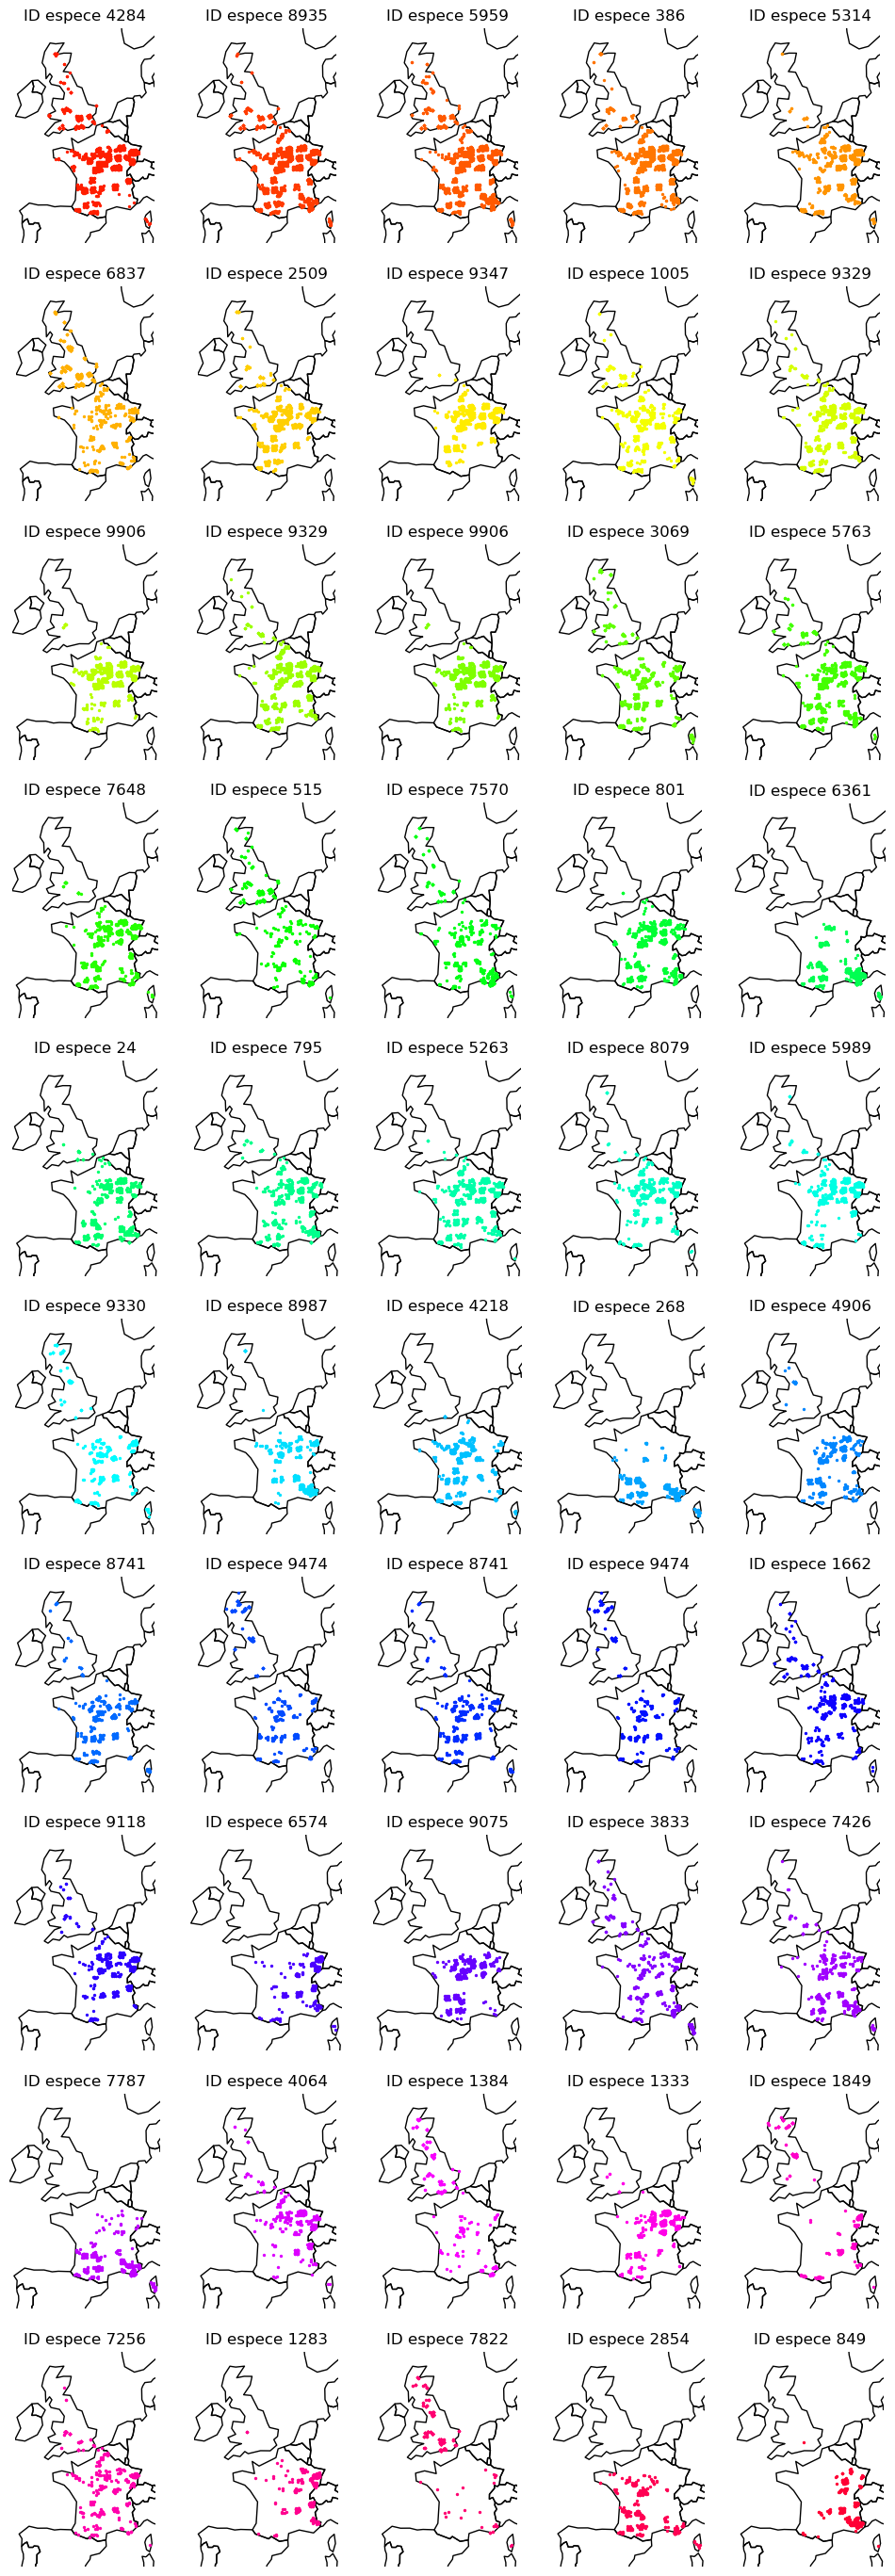

In [13]:
# Créez une figure avec plusieurs sous-graphiques
fig = plt.figure(figsize=(12, 35))  # Augmentez la taille de la figure si nécessaire
colors = sns.color_palette("hsv", 50)  # Vous pouvez choisir une autre palette si vous le souhaitez
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
xmin, xmax, ymin, ymax = -10, 10, 40, 60

for i in range(50):
    # Ajoutez un sous-graphique à la figure
    ax = fig.add_subplot(10, 5, i + 1)  # 10 lignes, 5 colonnes
    
    # Configurez la carte GeoPandas 'world'
    world_ax = world.plot(ax=ax, color='none')
    world_ax.set_xlim(xmin, xmax)
    world_ax.set_ylim(ymin, ymax)
    world_ax.set_title('ID espece {}'.format(top_50[i]))
    world_ax.set_axis_off()
    gdf = gpd.GeoDataFrame(data_frames[i], geometry=gpd.points_from_xy(data_frames[i].lon, data_frames[i].lat), crs="EPSG:4326")
    
    # Tracez les points sur la carte GeoPandas 'world'
    gdf.plot(ax=world_ax, color=colors[i], markersize=2)

# Affichez la figure
plt.show()

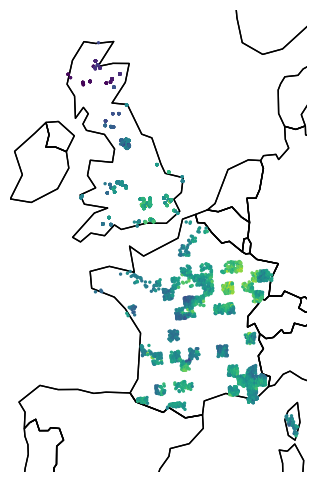

In [14]:
enviroTab = pd.read_csv("../Data/Data_train/enviroTab_pa_train.csv", sep = ';') # import des donnees abiotiques du train
enviroTab = gpd.GeoDataFrame(enviroTab, geometry=gpd.points_from_xy(enviroTab.lon, enviroTab.lat), crs="EPSG:4326") #ajout d'une colonne au format geometry pour pouvoir plot

ax = world.plot(figsize=(6,6), color='none')
# Configurez la carte GeoPandas 'world'
world_ax = world.plot(ax=ax, color='none')
world_ax.set_xlim(xmin, xmax)
world_ax.set_ylim(ymin, ymax)
world_ax.set_axis_off()
  
# Tracez les points sur la carte GeoPandas 'world'
enviroTab.plot(ax=world_ax, markersize=2, column='clay')

# Affichez la figure
plt.show()

In [15]:
# Obtenez les noms de colonnes du DataFrame enviroTab
liste_des_colonnes = enviroTab.columns.tolist()

# Affichez la liste des noms de colonnes
print(liste_des_colonnes)
moy = enviroTab['clay'].mean()
enviroTab['clay'] = enviroTab['clay']-moy

['patchID', 'dayOfYear', 'lon', 'lat', 'x_EPSG3035', 'y_EPSG3035', 'year', 'dataset', 'geoUncertaintyInM', 'bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19', 'bdod', 'cec', 'cfvo', 'clay', 'nitrogen', 'phh2o', 'sand', 'silt', 'soc', 'landCov', 'Built1994', 'Lights1994', 'NavWater1994', 'Built2009', 'Lights2009', 'NavWater2009', 'Popdensity1990', 'Popdensity2010', 'Railways', 'Roads', 'geometry']


In [16]:
enviroTab = gpd.GeoDataFrame(enviroTab, geometry=gpd.points_from_xy(enviroTab.lon, enviroTab.lat), crs="EPSG:4326")
